Frank Wood's UBC computer sience research group has compiled data about minecraft players which includes information about the players themselves, and about how they play the game.  One of the questions they are interesting in answering is which characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types.  I will be diving further into this question by answering which characteristics, specificaly looking at age, gender, experience, and played hours are associated with subscribing and can be used as predictors for subscribing to a game-related newsletter?

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


I loaded the tidyverse library to get access to read_csv and all the other tidyverse functions I will need.

In [2]:
players<- read_csv("players.csv")
players

sessions<- read_csv("sessions.csv")
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


I read the two files I need for this project into R using read_csv.  The "players" table includes information about the players'experience (chr) described as beginner/amateur/pro/veteran, their subscription status (their hashed email (chr) which is way to identify them, played hours (dbl), name (chr), gender (chr), and age (dbl).  The "sessions" table incldes information and about the players' hashed email (chr), start time (chr), end time (chr).  The start and end times are also included in the "sessions" table in a numeric way, labelled as original start and end times (dbl).  The "players" table has 196 observations, and the "players" table has 1535 obervations. In my project, I will only be using data from the "players" dataset, and will be using all the data from it which I mentioned.

In [3]:
players_simple<- players |>
select(-hashedEmail, -name)
players_simple

experience,subscribe,played_hours,gender,Age
<chr>,<lgl>,<dbl>,<chr>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
Amateur,TRUE,0.7,Female,21
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.0,Female,17
Regular,TRUE,0.0,Female,19
Amateur,FALSE,0.0,Male,21
Amateur,TRUE,0.1,Male,17


In this step, I removed the hashed email and name columns from the dataset as I will not need it for my analysis.

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


experience,subscribe,count
<fct>,<lgl>,<int>
Amateur,FALSE,18
Amateur,TRUE,45
Beginner,FALSE,8
Beginner,TRUE,27
Pro,FALSE,4
Pro,TRUE,10
Regular,FALSE,7
Regular,TRUE,29
Veteran,FALSE,15


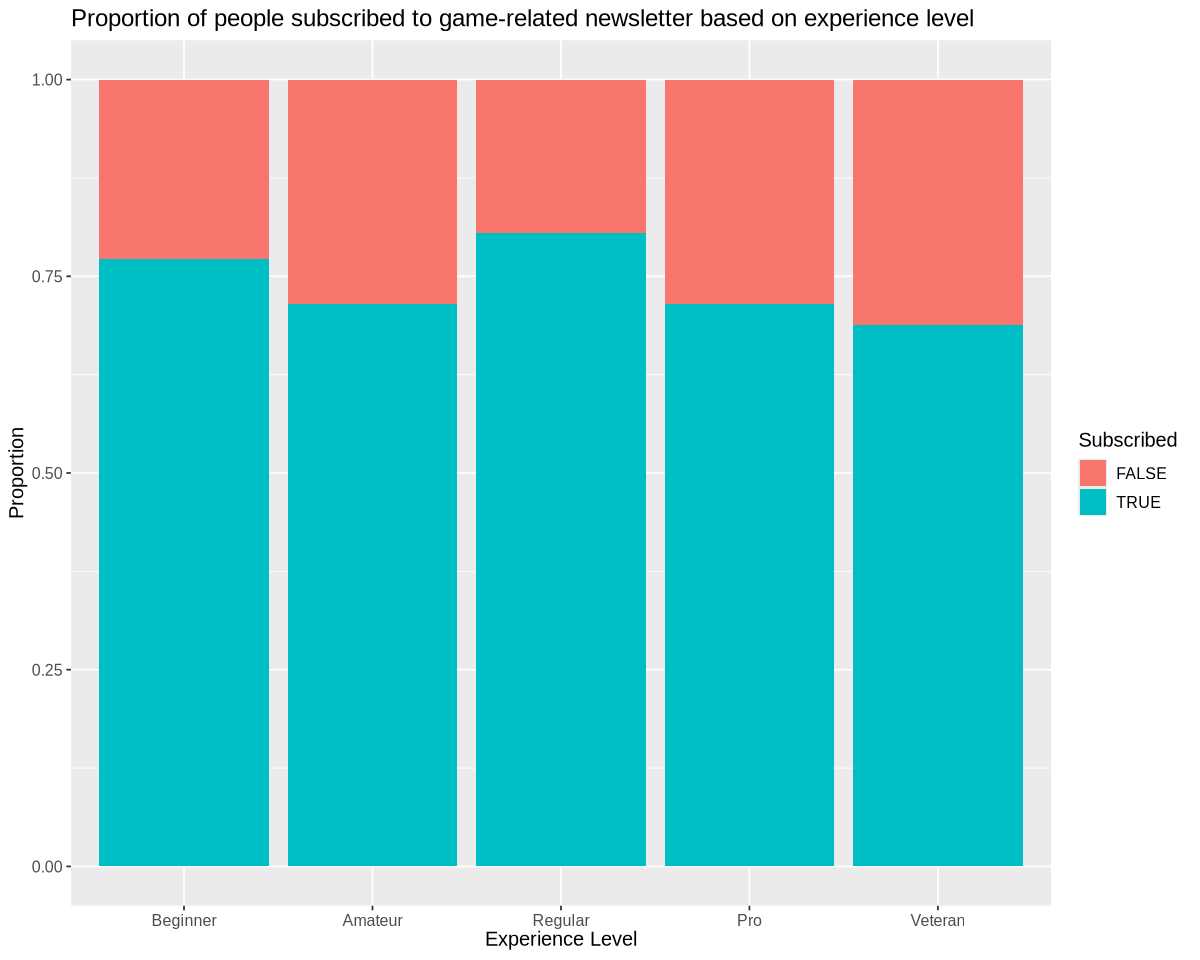

In [4]:
players_experience<- players_simple |>
select(experience, subscribe) |>
group_by(experience, subscribe) |>
summarize(count=n()) |>
mutate(experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")))
players_experience

options(repr.plot.width=10, repr.plot.height=8)
experience_plot<- players_experience |>
ggplot(aes(x=experience, y=count, fill=subscribe)) +
geom_bar(stat="identity", position="fill")+
labs(x="Experience Level", y="Proportion", title="Proportion of people subscribed to game-related newsletter based on experience level", fill="Subscribed")+
theme(text=element_text(size=12))
experience_plot

From the simplified dataset, I selected the columns "experience" and "subscribe", as I first wanted to test if experience can be used to predict if a subscription is made.  I then grouped the data by experience and by subscribe, and used summarize to get a count of how many people are or are not subscribed for each level of experience.  I then mutated the data so that it is displayed in ascending order of experience, as this would make a trend easier to visualize.  I then plotted the data into a bar plot, using experience as my x-axis categories, and proportion as my y-axis, with the colour indiciating a subscription or no subscription.  It was important to use proption, as each combination of experience and subscription had a different number of people, and these groups therefore would have been unfair to compare by count, and count would not have given any valuable insights. I also gave the plot suitable dimentions and text size.  By looking at the graph, there is not enough evidence to conclude that there is a relationshio between experience level and buying a subscription.  There is no logical trend when looking at the proportion of peope who have a subscription at each experience level as you ascend experience levels, and there is a minimal difference in proportion of subscribed individuals between all the experience levels.  Therefore, experience level should not be used to predict whether one subscribes or not.

`summarise()` has grouped output by 'gender'. You can override using the
`.groups` argument.


gender,subscribe,count
<chr>,<lgl>,<int>
Agender,TRUE,2
Female,FALSE,8
Female,TRUE,29
Male,FALSE,31
Male,TRUE,93
Non-binary,FALSE,4
Non-binary,TRUE,11
Other,TRUE,1
Prefer not to say,FALSE,7


`summarise()` has grouped output by 'gender'. You can override using the
`.groups` argument.


gender,subscribe,count
<chr>,<lgl>,<int>
Female,FALSE,8
Female,TRUE,29
Male,FALSE,31
Male,TRUE,93
Non-binary,FALSE,4
Non-binary,TRUE,11


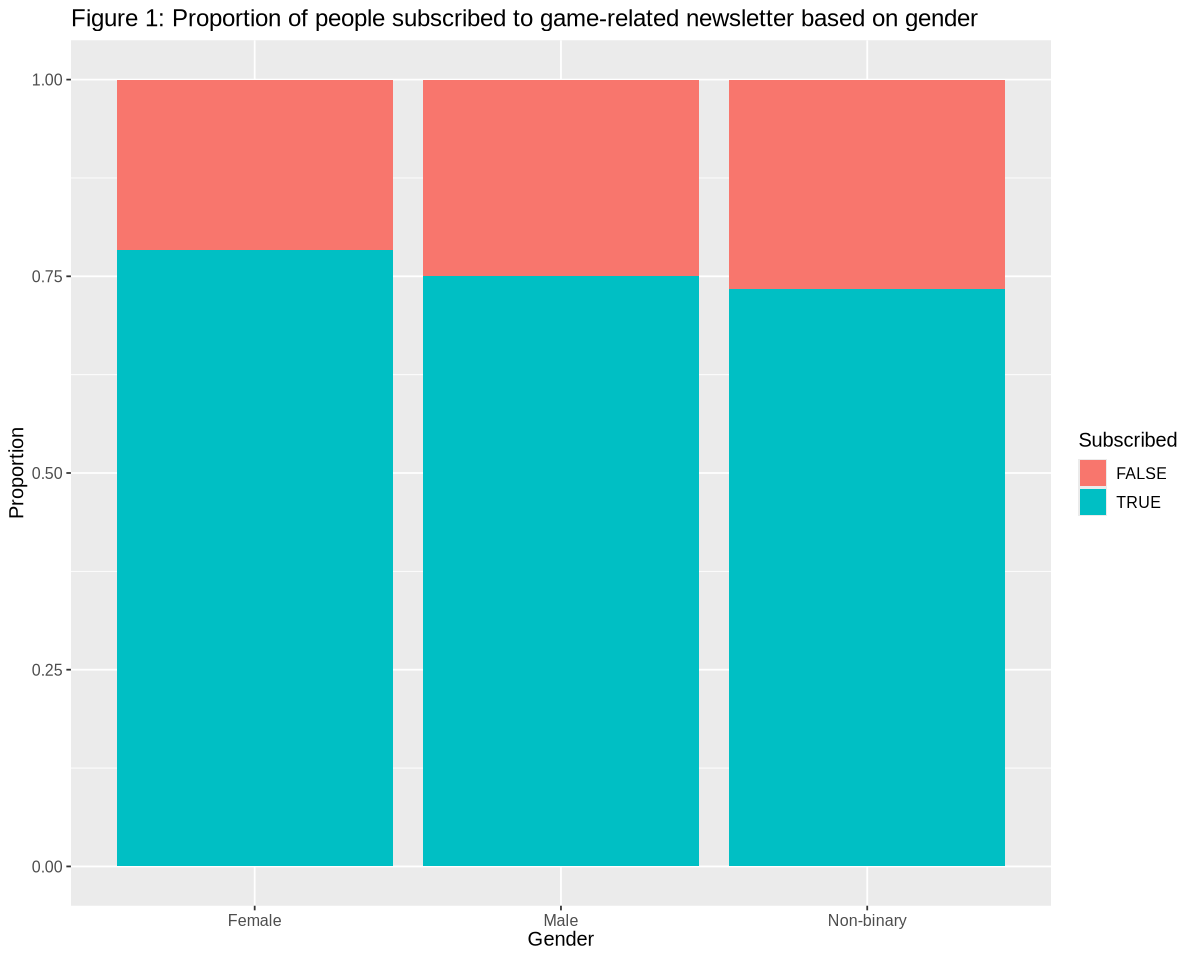

In [17]:
players_gender<- players_simple |>
select(gender, subscribe) |>
group_by(gender, subscribe) |>
summarize(count=n())
players_gender

players_gender_best<- players_simple |>
select(gender, subscribe) |>
filter(gender=="Male" | gender=="Female" | gender=="Non-binary") |>
group_by(gender, subscribe) |>
summarize(count=n())
players_gender_best

options(repr.plot.width=10, repr.plot.height=8)
gender_plot<- players_gender_best |>
ggplot(aes(x=gender, y=count, fill=subscribe)) +
geom_bar(stat="identity", position="fill")+
labs(x="Gender", y="Proportion", title="Figure 1: Proportion of people subscribed to game-related newsletter based on gender", fill="Subscribed")+
theme(text=element_text(size=12))
gender_plot

From the simplified dataset, I selected the columns "gender" and "subscribe", as I wanted to test if experience can be used to predict if a subscription is made. I then grouped the data by gender and by subscribe, and used summarize to get a count of how many people are or are not subscribed for each gender. After running this code and generating a table, I realzied that the number of males and females far exceeded the amount of people who identified as a different gender.  I then filtered for the genders "male", "female", and "non-binary".  Because of the small smapling size, I concluded that it would be unfair to compare males and females with the other genders.  Non-binary could have gone either way in terms of sampling size - it was not quite as little as other genders but not quite as high as male and female to be considered equal enough to get a great conclusion.  Because it was inbetween, I decided to just include it so I could visualize it, knowing that I can jsut choose to discard it.  I then plotted the data into a bar plot, using gender as my x-axis categories, and proportion as my y-axis, with the colour indiciating a subscription or no subscription. It was important to use proption, as each combination of gender and subscription had a different number of people, and these groups therefore would have been unfair to compare by count, and count would not have given any valuable insights. I also gave the plot suitable dimentions and text size. By looking at the graph, there is not enough evidence to conclude that there is a relationship between experience level and buying a subscription. There is a minimal difference in proportion of subscribed individuals between all the genders.  Therefore, gender should not be used to predict whether one subscribes or not.

age_group,subscribe,count,prop
<fct>,<lgl>,<int>,<dbl>
"[8,13)",TRUE,5,1.0000000
"[13,18)",FALSE,17,0.2073171
"[13,18)",TRUE,65,0.7926829
"[18,23)",FALSE,16,0.2622951
"[18,23)",TRUE,45,0.7377049
"[23,28)",FALSE,10,0.3030303
"[23,28)",TRUE,23,0.6969697
"[28,33)",FALSE,3,0.7500000
"[28,33)",TRUE,1,0.2500000


age_group,subscribe,count,prop
<fct>,<lgl>,<int>,<dbl>
"[8,13)",TRUE,5,1.0000000
"[13,18)",FALSE,17,0.2073171
"[13,18)",TRUE,65,0.7926829
"[18,23)",FALSE,16,0.2622951
"[18,23)",TRUE,45,0.7377049
"[23,28)",FALSE,10,0.3030303
"[23,28)",TRUE,23,0.6969697


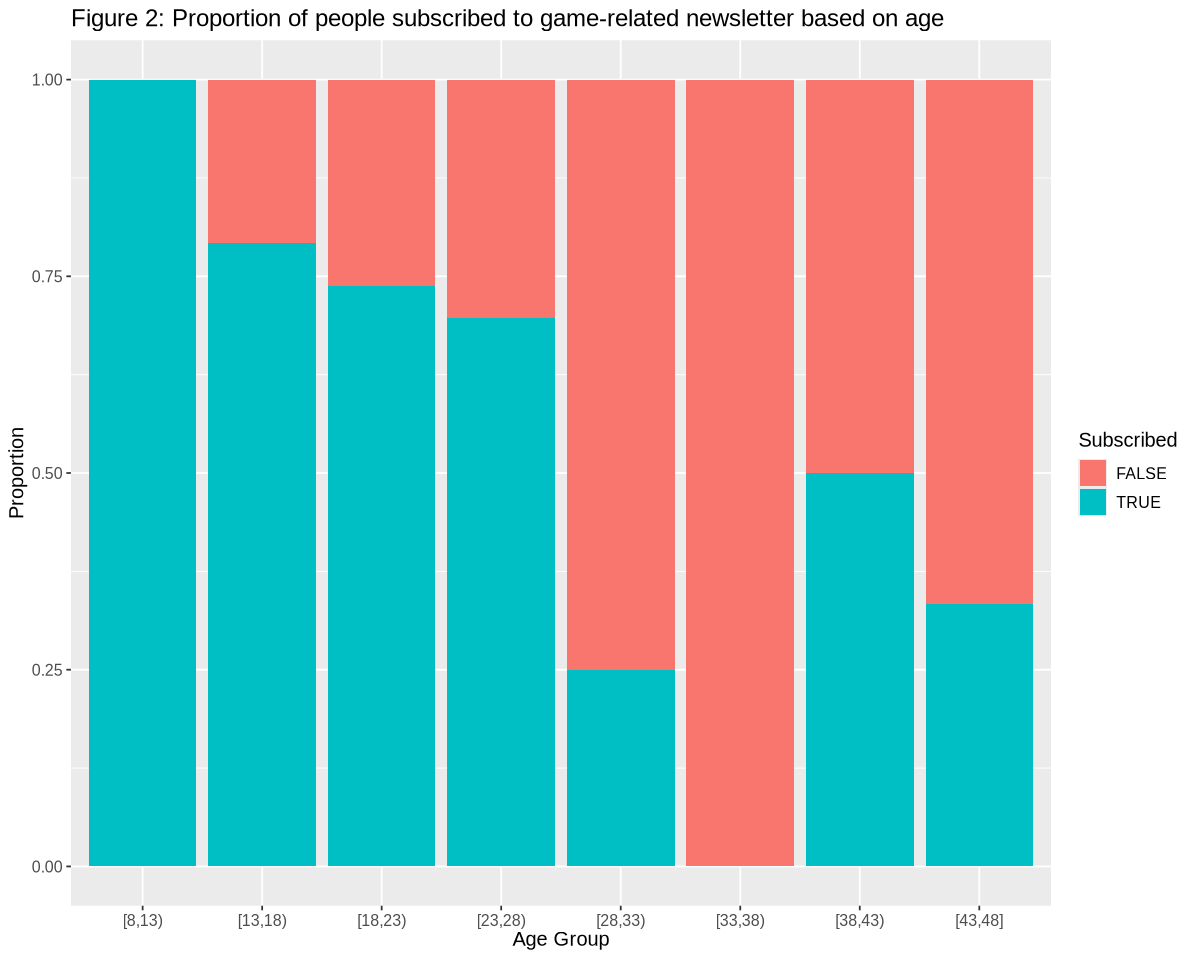

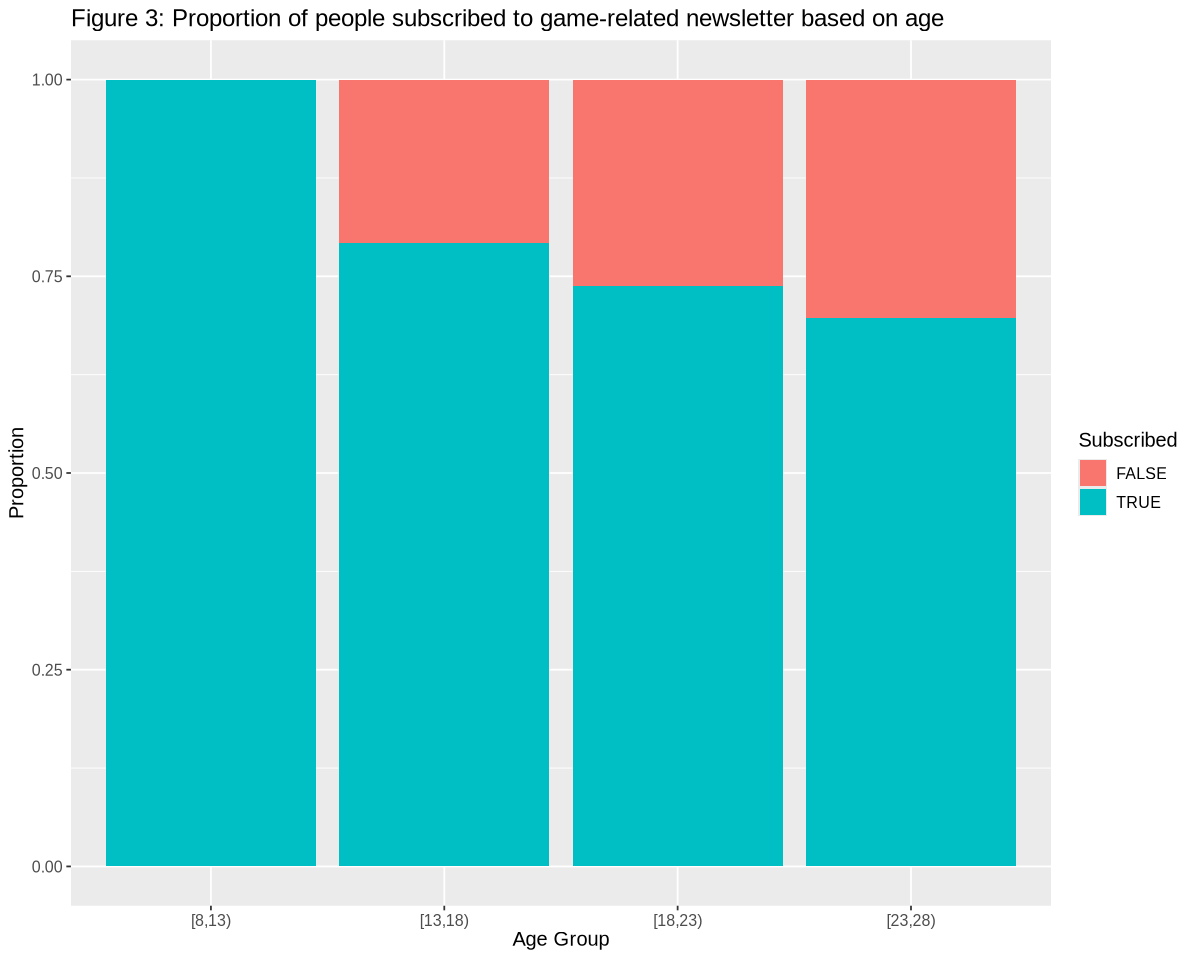

In [18]:
players_age<- players_simple |>
select(Age, subscribe) |>
filter(!is.na(Age)) |>
mutate(age_group = cut(Age, 
          breaks = seq(floor(min(Age)), ceiling(max(Age)), by = 5),
                         include.lowest = TRUE,
                         right = FALSE)) |>
group_by(age_group, subscribe) |>
summarise(count = n(), .groups = "drop") |>
group_by(age_group) |>
mutate(prop = count / sum(count)) |>
filter(!is.na(age_group))
players_age

players_age_best<- players_age |>
filter(age_group=="[8,13)" | age_group=="[13,18)" | age_group=="[18,23)" | age_group=="[23,28)")
players_age_best

options(repr.plot.width=10, repr.plot.height=8)
age_plot<- players_age |>
ggplot(aes(x=age_group, y=count, fill=subscribe)) +
geom_bar(stat="identity", position="fill")+
labs(x="Age Group", y="Proportion", title="Figure 2: Proportion of people subscribed to game-related newsletter based on age", fill="Subscribed")+
theme(text=element_text(size=12))
age_plot

options(repr.plot.width=10, repr.plot.height=8)
age_plot_filtered<- players_age_best |>
ggplot(aes(x=age_group, y=count, fill=subscribe)) +
geom_bar(stat="identity", position="fill")+
labs(x="Age Group", y="Proportion", title="Figure 3: Proportion of people subscribed to game-related newsletter based on age", fill="Subscribed")+
theme(text=element_text(size=12))
age_plot_filtered

From the simplified dataset, I selected the columns "age" and "subscribe", as I wanted to test if age can be used to predict if a subscription is made. I then filtered out any N/A from the age column, and proceeded to configure the dataset so that age is displayed as bins of years of 5.  Then I grouped by the age group and subscribe, and used sumamrzie to get a count of how many people fell into each bin. After running the code and creating a table, I realized that the number of people who fell into the bins starting from age 8 until age 28 far exceeded the number of people who fell into bins of age higher than 28, therefore, it would be unfair to draw conclusions based on a comparison between ages lower and higher than 28 due to sampling size.  Therefore, I created a new table which was filtered only for ages 8 to 28.  I then plotted both the full data and the filtered data into a bar plot, using age group as my x-axis categories, and proportion as my y-axis, with the colour indiciating a subscription or no subscription. It was important to use proption, as each combination of age and subscription had a different number of people, and these groups therefore would have been unfair to compare by count, and count would not have given any valuable insights. I also gave the plot suitable dimentions and text size. By looking at the graph with all the age groups, there is a noticable trend in the age groups up until age 28, which we can look at more closely in the other graph.  Beyond age 28, there is no specific trend, which may be a result of the high randomness and variability because of the small sample size, so we cannot draw conclusions regarding a correlation between age and subscriptions from this.  Looking at the filtered graph, we can see that as age increases from 8 towards 28, the proportion of subscriptions decreases.  Therefore, we can say that from ages 8 until 28, age can be used to predict whether one subscribes or not; more specifially, what percentage of the time one will subscribe or the probability that a given person will subscription.

hours_group,subscribe,count,prop
<fct>,<lgl>,<int>,<dbl>
"[0,5)",FALSE,51,0.281768
"[0,5)",TRUE,130,0.718232
"[5,10)",FALSE,1,0.500000
"[5,10)",TRUE,1,0.500000
"[10,15)",TRUE,1,1.000000
"[15,20)",TRUE,2,1.000000
"[20,25)",TRUE,1,1.000000
"[30,35)",TRUE,2,1.000000
"[45,50)",TRUE,1,1.000000


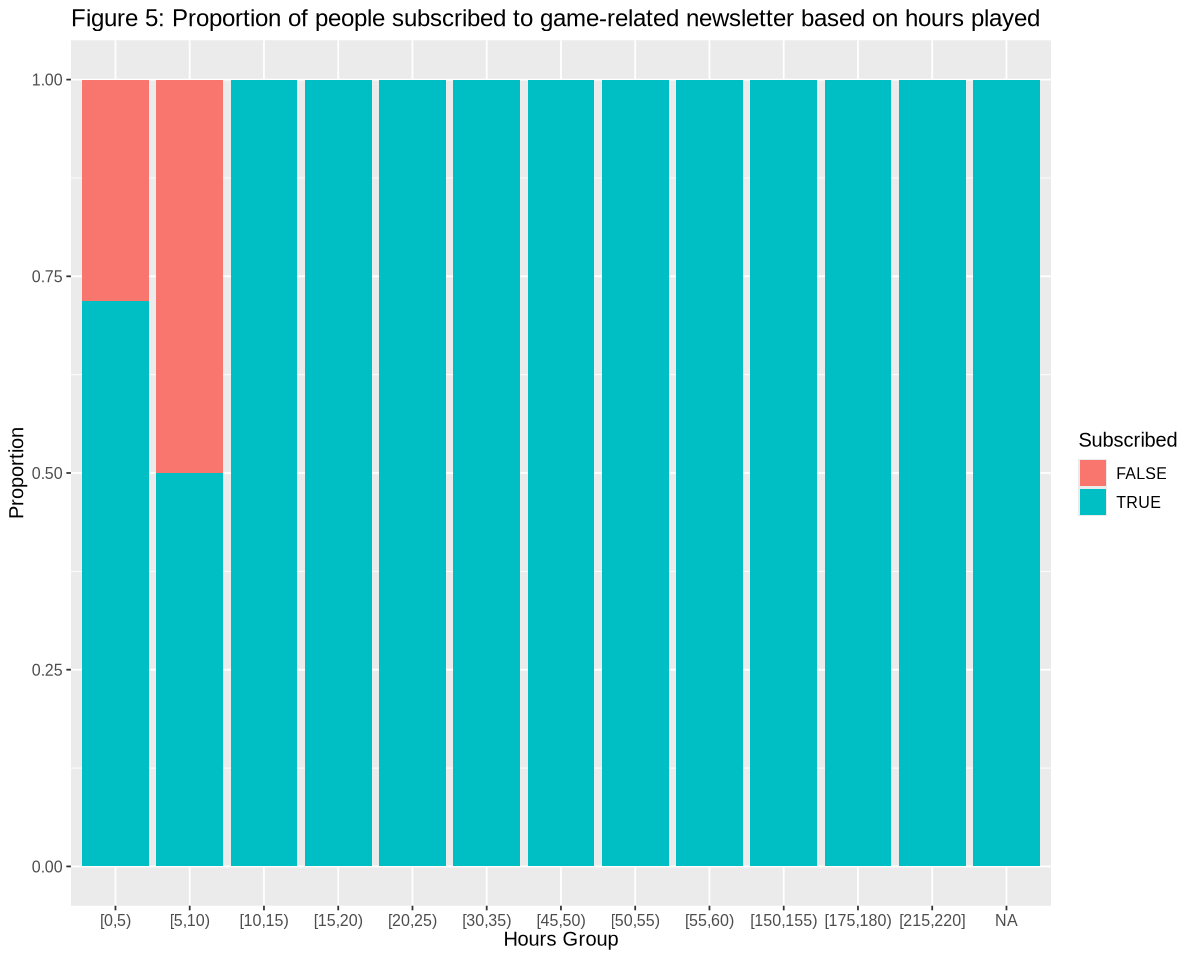

In [19]:
players_time <- players_simple |>
select(played_hours, subscribe) |>
filter(!is.na(played_hours)) |>
mutate(
    played_hours = as.numeric(played_hours),
    hours_group = cut(
      played_hours,
      breaks = seq(floor(min(played_hours)), ceiling(max(played_hours)), by = 5),
      include.lowest = TRUE,
      right = FALSE)) |>                    
group_by(hours_group, subscribe) |>   
summarise(count = n(), .groups = "drop") |>  
group_by(hours_group) |>
mutate(prop = count / sum(count)) 
players_time

options(repr.plot.width=10, repr.plot.height=8)
time_plot<- players_time |>
ggplot(aes(x=hours_group, y=count, fill=subscribe)) +
geom_bar(stat="identity", position="fill")+
labs(x="Hours Group", y="Proportion", title="Figure 5: Proportion of people subscribed to game-related newsletter based on hours played", fill="Subscribed")+
theme(text=element_text(size=12))
time_plot

From the simplified dataset, I selected the columns "played_hours" and "subscribe", as I wanted to test if hours played can be used to predict if a subscription is made. I then filtered out any N/A from the played_hours column, and proceeded to configure the dataset so that played_hours is displayed as bins of years of 5.  Then I grouped by the hours group and subscribe, and used sumamrzie to get a count of how many people fell into each bin. I then plotted the data into a bar plot, using hours group as my x-axis categories, and proportion as my y-axis, with the colour indiciating a subscription or no subscription. It was important to use proption, as each combination of age and subscription had a different number of people, and these groups therefore would have been unfair to compare by count, and count would not have given any valuable insights. By looking at the graph, the number of players who play between 0 and 5 hours far exceeds the amount that play any another amount of time.  Therefore, due to big inconsistencies in sampling size, specifically the very small sampling size for any time above 5 hours, we cannot draw any conclusions from this graph regarding the connection between hours playing and subscriptions.

Overall, I was able to find a correlation between age and the subscription to a game related newsletter in the range of 8 to 28 years old. As a result, the age of a person in this age range can be used to predict the probability of one subscribing, or how many will subscribe out of given population.  For all the other variables such as gender, experience, and hours played, the data indicated that these cannot be used as predictors, or the data was not conclsuive enough to know if these are appropriate predictors.  One of the limitations to my approach was the inconsistencies in sample sizes, which lead to much inconclusive data.  On the other hand, one of the advantags to my approach was that I was able to use proportions to eliminate the bias of different sample sizes to some extent, and the way I presented data through the bar charts made it easy to comapre categories. These findings could lead to further questions regarding any other variables that could be used to predict a subscription.  These findings could also lead to questions for the department conducting the study about the limits of their sampling and what can be done to sample a wider population to be able to draw more conclusions. 